In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
#inline backend pour voir les figures dans le frontend notebook https://ipython.readthedocs.io/en/stable/interactive/plotting.html

nobs=20
seed_obs=5
ntheta=60
seed_theta=1
#file_name='results_'+str(nobs)+"obs_quad"+str(ntheta)+"/"
file_name='results/'
shortprefixe=file_name+str(nobs)+'_'+str(seed_obs)


logp_koh=pd.DataFrame(data=np.loadtxt(shortprefixe+"_lp_koh.gnu"),columns=['t1','prob'])
logp_opti=pd.DataFrame(data=np.loadtxt(shortprefixe+"_lp_opti.gnu"),columns=['t1','prob'])
hpars_opti=pd.DataFrame(data=np.loadtxt(shortprefixe+"_hpars_opti.gnu"),columns=['t1','edm','exp','lcor'])
obs=pd.DataFrame(data=np.loadtxt(shortprefixe+"_observations.gnu"),columns=['t1','obs'])
p_bayes=pd.DataFrame(data=np.loadtxt(shortprefixe+"_p_bayes.gnu"),columns=['t1','prob'])
p_bayesestimate=pd.DataFrame(data=np.loadtxt(shortprefixe+"_p_bayes_estimate.gnu"),columns=['t1','prob'])
p_optiestimate=pd.DataFrame(data=np.loadtxt(shortprefixe+"_p_opti_estimate.gnu"),columns=['t1','prob'])
p_kohestimate=pd.DataFrame(data=np.loadtxt(shortprefixe+"_p_koh_estimate.gnu"),columns=['t1','prob'])
#samp_mcmc=pd.DataFrame(data=np.loadtxt(shortprefixe+"_samples_mcmc.gnu"),columns=['t1','edm','exp','lcor','prob'])
samp_mcmcselect=pd.DataFrame(data=np.loadtxt(shortprefixe+"_samples_mcmc_select.gnu"),columns=['t1','edm','exp','lcor','prob'])

#summary=pd.DataFrame(data=np.loadtxt(file_name+'summary.gnu'),columns=['nobs','seed_obs','n_theta','seed_theta','time_koh','time_opti','time_bayes','edm_koh','exp_koh','lcor_koh','klbo','klbk','entopti','entkoh','entbayes','evkoh','mapopti','mapkoh','mapbayes','meanopti','meankoh','meanbayes'])
#la lecture de summary rend une erreur si il n'y a qu'une seule ligne dans le fichier...

#pred_opti=pd.DataFrame(data=np.loadtxt(prefixe+'_pred_opti.gnu'),columns=['x','fmean','flow','fsup','flowlow','fsupsup']) #DataFramequi
#pred_cv=pd.DataFrame(data=np.loadtxt(prefixe+'_pred_cv.gnu'),columns=['x','fmean','flow','fsup','flowlow','fsupsup']) #DataFramequi




OSError: results/20_5_lp_koh.gnu not found.

In [17]:
#Définition du style de plots
plt.style.use('seaborn-white')
# pour la customisation des rcParams : https://matplotlib.org/3.2.0/tutorials/introductory/customizing.html
#print(mpl.rcParams)
mpl.rcParams['axes.labelsize']= 20.0 #def value : 11.0
mpl.rcParams['axes.titlesize']= 20.0 #def value : 12.0
mpl.rcParams['font.size']= 20.0 #def value : 10.0
mpl.rcParams['lines.markersize']= 15.0 #def value : 7.0
mpl.rcParams['lines.linewidth']= 3 #def value : 1.75
mpl.rcParams['legend.fontsize']= 18.0 #def value : 10.0
mpl.rcParams['legend.frameon']= True
mpl.rcParams['text.usetex']= False
mpl.rcParams['xtick.labelsize']= 15.0 #def value : 10.0
mpl.rcParams['xtick.major.size']= 10.0 #taille des ticks
mpl.rcParams['ytick.labelsize']= 15.0 #def value : 10.0
mpl.rcParams['ytick.major.size']= 10.0 #taille des ticks

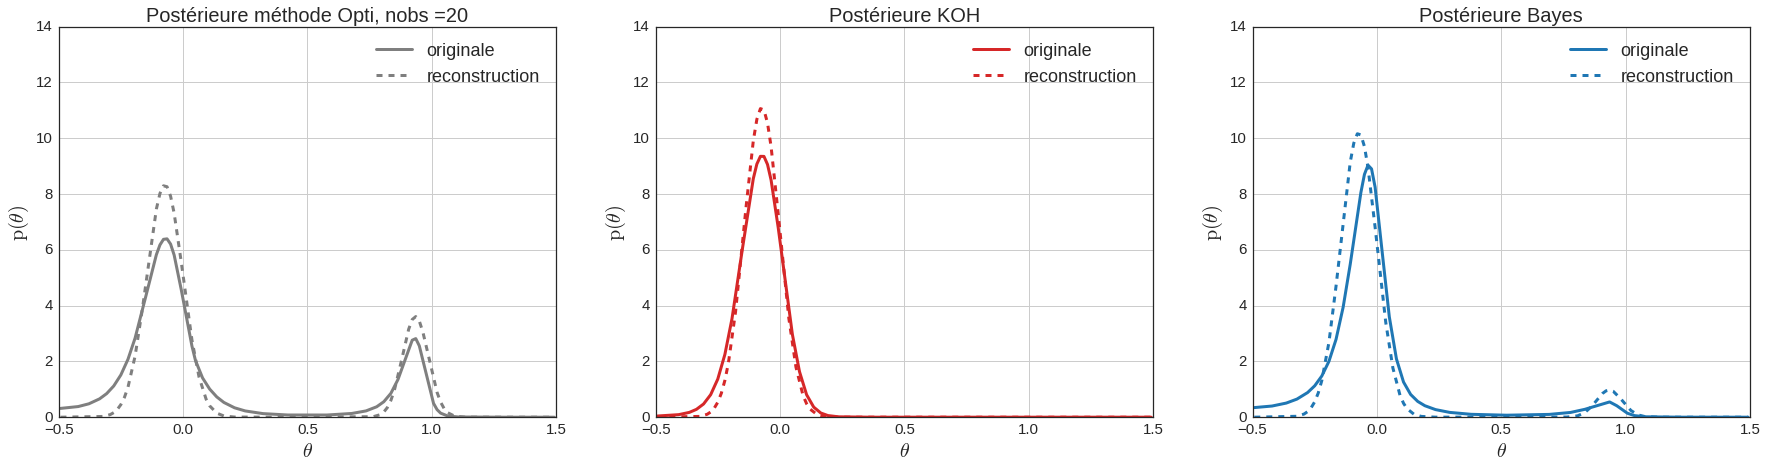

In [39]:
#Contourplot de la postérieure. On peut avoir des couleurs continues avec imshow, voir https://jakevdp.github.io/PythonDataScienceHandbook/04.04-density-and-contour-plots.html
plt.style.reload_library()
plt.style.use('mystyle')
mpl.rcParams['savefig.format']='eps'


ndisc=int(np.sqrt(logp_opti['t1'].size))
nobs=obs['obs'].size
xmin=-0.5
xmax=1.5
ymin=0
ymax=14



plt.figure(figsize=[27,7])
ax=plt.subplot(131)
cs=plt.plot('t1','prob',data=logp_opti,label='originale',color='tab:grey')
cs=plt.plot('t1','prob','--',data=p_optiestimate,label='reconstruction',color='tab:grey')
plt.title('Postérieure méthode Opti, nobs ='+str(nobs))
ax.set_xlabel(r'$\theta$')
ax.set_ylabel(r'$\mathrm{p}(\theta)$')
plt.grid()
plt.legend()
ax.set_xlim(xmin,xmax)
ax.set_ylim(ymin,ymax)

ax=plt.subplot(132)
cs=plt.plot('t1','prob',data=logp_koh,label='originale',color='tab:red')
cs=plt.plot('t1','prob','--',data=p_kohestimate,label='reconstruction',color='tab:red')
plt.title('Postérieure KOH')
ax.set_xlim(xmin,xmax)
ax.set_ylim(ymin,ymax)
ax.set_xlabel(r'$\theta$')
ax.set_ylabel(r'$\mathrm{p}(\theta)$')
plt.legend()
plt.grid()

ax=plt.subplot(133)
cs=plt.plot('t1','prob',data=p_bayes,label='originale',color='tab:blue')
cs=plt.plot('t1','prob','--',data=p_bayesestimate,label='reconstruction',color='tab:blue')
plt.title('Postérieure Bayes')
ax.set_xlim(xmin,xmax)
ax.set_ylim(ymin,ymax)
ax.set_xlabel(r'$\theta$')
ax.set_ylabel(r'$\mathrm{p}(\theta)$')
plt.legend()
plt.grid()
plt.savefig('test')


1.4651162790697674


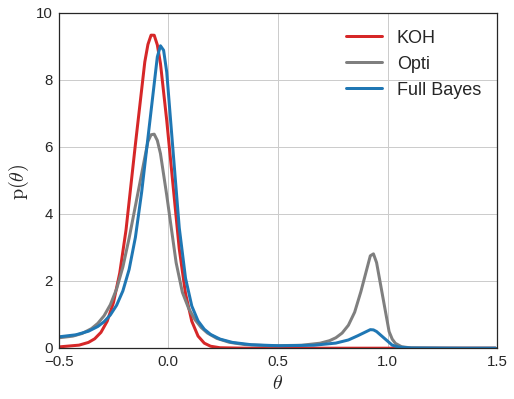

In [27]:
#affichage des densités sur un même graphe propre.
ndisc=int(np.sqrt(logp_opti['t1'].size))
nobs=obs['obs'].size
xmin=-0.5
xmax=1.5
ymin=0
ymax=10



plt.figure(figsize=[7,6])
ax=plt.subplot(111)

plt.plot('t1','prob',data=logp_koh,label=r'KOH',color='tab:red')
plt.plot('t1','prob',data=logp_opti,label=r'Opti',color='tab:grey')
plt.plot('t1','prob',data=p_bayes,label=r'Full Bayes',color='tab:blue')
ax.set_xlim(xmin,xmax)
ax.set_ylim(ymin,ymax)
ax.set_xlabel(r'$\theta$')
ax.set_ylabel(r'$\mathrm{p}(\theta)$')
plt.legend()
plt.grid()
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', None)
print(6.3/4.3)

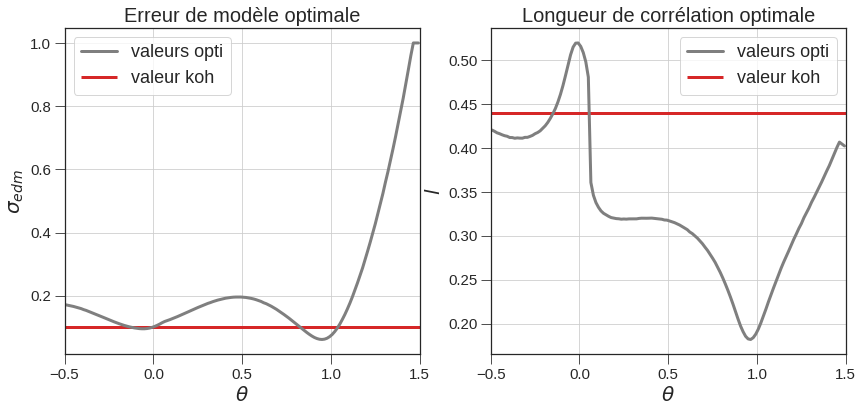

In [432]:
#Contourplot de la postérieure. On peut avoir des couleurs continues avec imshow, voir https://jakevdp.github.io/PythonDataScienceHandbook/04.04-density-and-contour-plots.html

ndisc=int(np.sqrt(logp_opti['t1'].size))
xmin=-0.5
xmax=1.5
ymin=0
ymax=0.2
nobs=obs['obs'].size



plt.figure(figsize=[14,6])
ax=plt.subplot(121)
cs=plt.plot('t1','edm',data=hpars_opti,label='valeurs opti',color='tab:grey')
plt.title('Erreur de modèle optimale')

plt.hlines(0.1,xmin,xmax,label='valeur koh',color='tab:red')
ax.set_xlabel(r'$\theta$')
ax.set_ylabel('$\sigma_{edm}$')
plt.grid()
plt.legend()
ax.set_xlim(xmin,xmax)
#ax.set_ylim(ymin,ymax)

ax=plt.subplot(122)
cs=plt.plot('t1','lcor',data=hpars_opti,label='valeurs opti',color='tab:grey')
plt.hlines(0.44,xmin,xmax,label='valeur koh',color='tab:red')
plt.title('Longueur de corrélation optimale')
plt.legend()
ax.set_xlim(xmin,xmax)
#ax.set_ylim(0.09,0.011)
ax.set_xlabel(r'$\theta$')
ax.set_ylabel(r'$l$')
plt.grid()

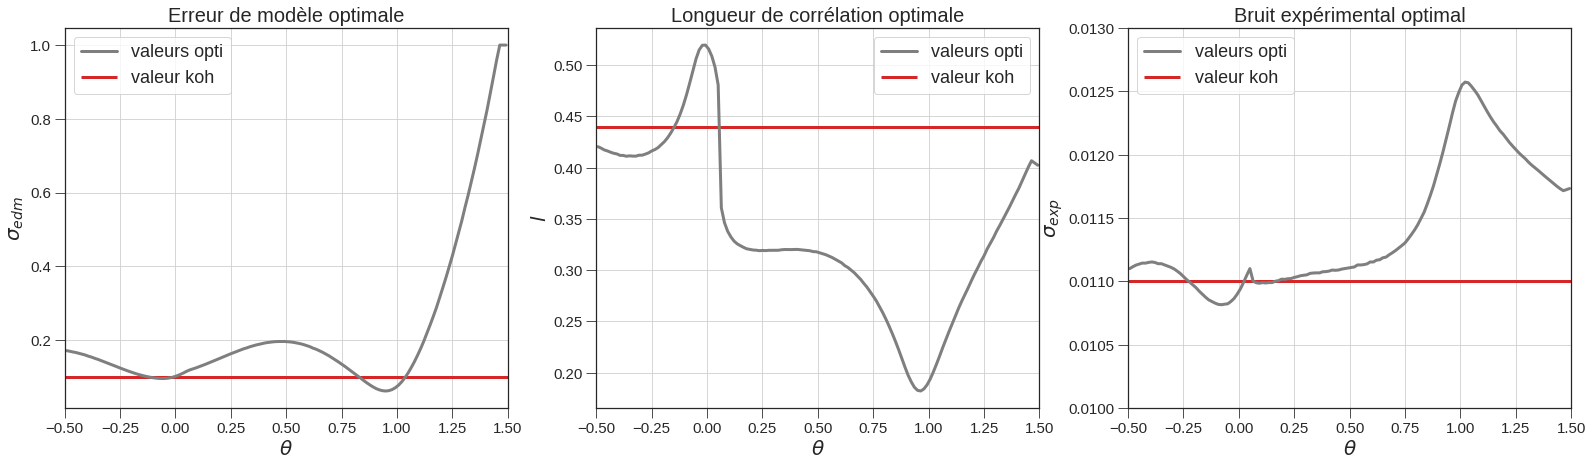

In [433]:
#Contourplot de la postérieure. On peut avoir des couleurs continues avec imshow, voir https://jakevdp.github.io/PythonDataScienceHandbook/04.04-density-and-contour-plots.html

ndisc=int(np.sqrt(logp_opti['t1'].size))
xmin=-0.5
xmax=1.5
ymin=0
ymax=0.2
nobs=obs['obs'].size



plt.figure(figsize=[27,7])
ax=plt.subplot(131)
cs=plt.plot('t1','edm',data=hpars_opti,label='valeurs opti',color='tab:grey')
plt.title('Erreur de modèle optimale')

plt.hlines(0.1,xmin,xmax,label='valeur koh',color='tab:red')
ax.set_xlabel(r'$\theta$')
ax.set_ylabel(r'$\sigma_{edm}$')
plt.grid()
plt.legend()
ax.set_xlim(xmin,xmax)
#ax.set_ylim(ymin,ymax)

ax=plt.subplot(132)
cs=plt.plot('t1','lcor',data=hpars_opti,label='valeurs opti',color='tab:grey')
plt.hlines(0.44,xmin,xmax,label='valeur koh',color='tab:red')
plt.title('Longueur de corrélation optimale')
plt.legend()
ax.set_xlim(xmin,xmax)
#ax.set_ylim(0.09,0.011)
ax.set_xlabel(r'$\theta$')
ax.set_ylabel(r'$l$')

plt.grid()
ax=plt.subplot(133)
cs=plt.plot('t1','exp',data=hpars_opti,label='valeurs opti',color='tab:grey')
plt.hlines(0.011,xmin,xmax,label='valeur koh',color='tab:red')
plt.title('Bruit expérimental optimal')
plt.legend()
ax.set_xlim(xmin,xmax)
ax.set_ylim(0.010,0.013)
ax.set_xlabel(r'$\theta$')
ax.set_ylabel(r'$\sigma_{exp}$')




plt.grid()

(0.0, 1.2)

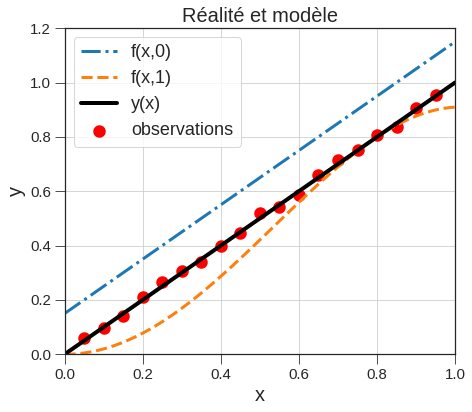

In [434]:
#affichage de la réalité et du modèle

def y(x):
    return x

def f(x,t):
    return x*np.sin(2*t*x)+(x+0.15)*(1-t)

X=np.linspace(0,1,100)

xmin=0
xmax=1
ymin=0
ymax=1.2



plt.figure(figsize=[7,6])
ax=plt.subplot(111)

cs=plt.plot(X,f(X,0),'-.',label='f(x,0)')
cs=plt.plot(X,f(X,1),'--',label='f(x,1)')
cs=plt.plot(X,y(X),label=r'y(x)',color='black',linewidth=4)
plt.title('Réalité et modèle')
plt.scatter('t1','obs',data=obs,marker='.',linewidth=5,color='red',label='observations')
ax.set_xlabel('x')
ax.set_ylabel('y')
plt.legend(loc=2)
plt.grid()
ax.set_xlim(xmin,xmax)
ax.set_ylim(ymin,ymax)

[   0    1    2 ... 9997 9998 9999]


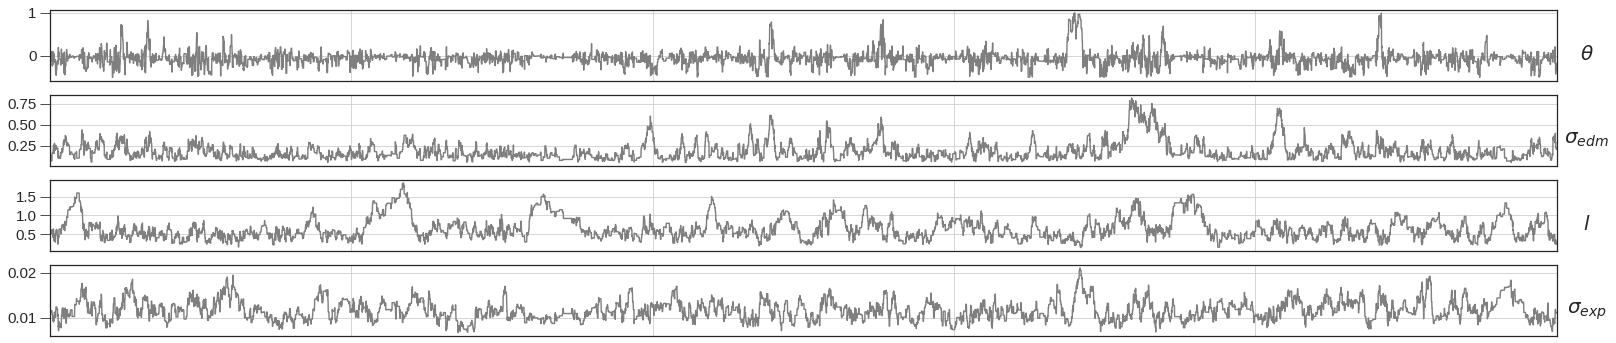

In [435]:
# affichage des samples de la mcmc.
#samp_mcmcselect=pd.DataFrame(data=np.loadtxt(shortprefixe+"_samples_mcmc_select.gnu"),columns=['t1','edm','exp','lcor','prob'])

lw=1.4 #linewidth
lp=30 #labelpad
#samp_mcmcselect['t1'].plot(kind='line')
X=np.arange(10000)
print(X)
#print(samp_mcmcselect['t1'][X])

plt.figure(figsize=[27,6])
ax=plt.subplot(411)
ax.plot(X,samp_mcmc['t1'][X],color='tab:grey',linewidth=lw)
ax.yaxis.set_label_position("right")
ax.set_xticklabels([])
ax.set_xlim(X[0],X[-1])
ax.set_ylabel(r'$\theta$',rotation='horizontal',labelpad=lp)
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False) # labels along the bottom edge are off
plt.grid()

ax=plt.subplot(412)
ax.plot(X,samp_mcmc['edm'][X],color='tab:grey',linewidth=lw)
ax.yaxis.set_label_position("right")
ax.set_xticklabels([])
ax.set_xlim(X[0],X[-1])
ax.set_ylabel(r'$\sigma_{edm}$',rotation='horizontal',labelpad=lp)
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False) # labels along the bottom edge are off
plt.grid()

ax=plt.subplot(413)
ax.plot(X,samp_mcmc['lcor'][X],color='tab:grey',linewidth=lw)
ax.yaxis.set_label_position("right")
ax.set_xticklabels([])
ax.set_xlim(X[0],X[-1])
ax.set_ylabel(r'$l$',rotation='horizontal',labelpad=lp)
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False) # labels along the bottom edge are off
plt.grid()

ax=plt.subplot(414)
ax.plot(X,samp_mcmc['exp'][X],color='tab:grey',linewidth=lw)
ax.yaxis.set_label_position("right")
ax.set_xticklabels([])
ax.set_xlim(X[0],X[-1])
ax.set_ylabel(r'$\sigma_{exp}$',rotation='horizontal',labelpad=lp)
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False) # labels along the bottom edge are off
plt.grid()

plt.show()




In [436]:
df=pd.DataFrame(summary['nobs'].drop_duplicates())

#paramètres de traçage
edmmin=0.05
edmmax=0.15
expmin=0.01
expmax=0.011
lcormin=0.15
lcormax=0.5
klmin=0
klmax=250
entmin=-130
entmax=-30
postmin=0
postmax=12

#courbes de présentation. calcul de valeurs (moyenne/écart-type)
#lecture des différents thetas existant dans summary.
ymin=df['nobs'].min()
ymax=ymin+3
thetamin=0
thetamax=1


edmkohmean=summary[summary.nobs.eq(nobs)]['edm_koh'].mean()
edmkohstd=summary[summary.nobs.eq(nobs)]['edm_koh'].std()
expkohmean=summary[summary.nobs.eq(nobs)]['exp_koh'].mean()
expkohstd=summary[summary.nobs.eq(nobs)]['exp_koh'].std()
lcorkohmean=summary[summary.nobs.eq(nobs)]['lcor_koh'].mean()
lcorkohstd=summary[summary.nobs.eq(nobs)]['lcor_koh'].std()

klbkmean=summary[summary.nobs.eq(nobs)]['klbk'].mean()
klbkstd=summary[summary.nobs.eq(nobs)]['klbk'].std()
klbomean=summary[summary.nobs.eq(nobs)]['klbo'].mean()
klbostd=summary[summary.nobs.eq(nobs)]['klbo'].std()

entoptimean=summary[summary.nobs.eq(nobs)]['entopti'].mean()
entoptistd=summary[summary.nobs.eq(nobs)]['entopti'].std()
entkohmean=summary[summary.nobs.eq(nobs)]['entkoh'].mean()
entkohstd=summary[summary.nobs.eq(nobs)]['entkoh'].std()
entbayesmean=summary[summary.nobs.eq(nobs)]['entbayes'].mean()
entbayesstd=summary[summary.nobs.eq(nobs)]['entbayes'].std()

meanoptimean=summary[summary.nobs.eq(nobs)]['meanopti'].mean()
meanoptistd=summary[summary.nobs.eq(nobs)]['meanopti'].std()
meankohmean=summary[summary.nobs.eq(nobs)]['meankoh'].mean()
meankohstd=summary[summary.nobs.eq(nobs)]['meankoh'].std()
meanbayesmean=summary[summary.nobs.eq(nobs)]['meanbayes'].mean()
meanbayesstd=summary[summary.nobs.eq(nobs)]['meanbayes'].std()

mapoptimean=summary[summary.nobs.eq(nobs)]['mapopti'].mean()
mapoptistd=summary[summary.nobs.eq(nobs)]['mapopti'].std()
mapkohmean=summary[summary.nobs.eq(nobs)]['mapkoh'].mean()
mapkohstd=summary[summary.nobs.eq(nobs)]['mapkoh'].std()
mapbayesmean=summary[summary.nobs.eq(nobs)]['mapbayes'].mean()
mapbayesstd=summary[summary.nobs.eq(nobs)]['mapbayes'].std()
    
df['edmkohmean']=edmkohmean
df['edmkohstd']=edmkohstd
df['expkohmean']=expkohmean
df['expkohstd']=expkohstd
df['lcorkohmean']=lcorkohmean
df['lcorkohstd']=lcorkohstd

df['klbkmean']=klbkmean
df['klbkstd']=klbkstd
df['klbomean']=klbomean
df['klbostd']=klbostd

df['entkohmean']=entkohmean
df['entkohstd']=entkohstd
df['entoptimean']=entoptimean
df['entoptistd']=entoptistd
df['entbayesmean']=entbayesmean
df['entbayesstd']=entbayesstd

df['meankohmean']=meankohmean
df['meankohstd']=meankohstd
df['meanoptimean']=meanoptimean
df['meanoptistd']=meanoptistd
df['meanbayesmean']=meanbayesmean
df['meanbayesstd']=meanbayesstd

df['mapkohmean']=mapkohmean
df['mapkohstd']=mapkohstd
df['mapoptimean']=mapoptimean
df['mapoptistd']=mapoptistd
df['mapbayesmean']=mapbayesmean
df['mapbayesstd']=mapbayesstd

print(df['meanoptimean'])




plt.figure(figsize=[21,14])
plt.suptitle('Résultats nobs='+str(nobs)+', n_theta='+str(ntheta))
ax=plt.subplot(231)
plt.errorbar(df['edmkohmean'],1,xerr=df['edmkohstd'],label='Edm KOH',marker='s',color='green')
ax.set_xlabel('edm')
ax.set_ylim(0,2)
ax.set_xlim(0,0.1)
plt.grid()
ax.legend()

ax=plt.subplot(232)
plt.errorbar(df['expkohmean'],1,xerr=df['expkohstd'],label='Exp KOH',marker='s',color='green')
ax.set_xlabel('exp')
ax.set_ylim(0,2)
ax.set_xlim(0,0.1)
plt.grid()
ax.legend()


ax=plt.subplot(233)
plt.errorbar(df['lcorkohmean'],1,xerr=df['lcorkohstd'],label='Lcor KOH',marker='s',color='green')
ax.set_xlabel('lcor')
ax.set_ylim(0,2)
ax.set_xlim(0,0.5)
plt.grid()

ax.legend()


ax=plt.subplot(234)
plt.errorbar(df['klbkmean'],1,xerr=df['klbkstd'],label='KL Bayes - KOH',marker='s',color='green')
plt.errorbar(df['klbomean'],1,xerr=df['klbostd'],label='KL Bayes - Opti',marker='s',color='blue')
ax.set_xlabel('KLDiv')
ax.set_ylim(0,2)
plt.grid()

ax.legend()


ax=plt.subplot(235)
plt.errorbar(df['entkohmean'],1.5,xerr=df['entkohstd'],label='Entropie KOH',marker='s',color='green')
plt.errorbar(df['entoptimean'],1,xerr=df['entoptistd'],label='Entropie Opti',marker='s',color='blue')
plt.errorbar(df['entbayesmean'],0.5,xerr=df['entbayesstd'],label='Entropie Bayes',marker='s',color='red')
ax.set_xlabel('Entropie')
plt.grid()
ax.legend()
plt.plot()

ax=plt.subplot(236)
plt.errorbar(df['meankohmean'],1.5,xerr=df['meankohstd'],label='Mean KOH',marker='o',color='green')
plt.errorbar(df['meanoptimean'],1,xerr=df['meanoptistd'],label='Mean Opti',marker='o',color='blue')
plt.errorbar(df['meanbayesmean'],0.5,xerr=df['meanbayesstd'],label='Mean Bayes',marker='o',color='red')

plt.errorbar(df['mapkohmean'],1.6,xerr=df['mapkohstd'],label='Map KOH',marker='s',color='green')
plt.errorbar(df['mapoptimean'],1.1,xerr=df['mapoptistd'],label='Map Opti',marker='s',color='blue')
plt.errorbar(df['mapbayesmean'],0.6,xerr=df['mapbayesstd'],label='Map Bayes',marker='s',color='red')

plt.title('Post')
ax.set_xlabel('theta')
ax.set_ylabel('p(theta)')
ax.set_xlim(thetamin,thetamax)
ax.set_ylim(0,2)
plt.grid()
plt.legend(loc=9)

      
      

NameError: name 'summary' is not defined

In [ ]:
#essayons d'afficher les densités moyennes obtenues par chaque méthode.

df=pd.DataFrame(summary['seed_obs'].drop_duplicates())
nrepet=df['seed_obs'].size
proba=pd.DataFrame()
proba['t1']=logp_koh['t1']
probkoh=np.zeros(60)
probopti=np.zeros(60)
probbayes=np.zeros(60)

for i in df['seed_obs']:
    shortprefixe=file_name+str(nobs)+'_'+str(int(i))
    templogp_koh=pd.DataFrame(data=np.loadtxt(shortprefixe+"_lp_koh.gnu"),columns=['t1','prob'])
    templogp_opti=pd.DataFrame(data=np.loadtxt(shortprefixe+"_lp_opti.gnu"),columns=['t1','prob'])
    tempp_bayes=pd.DataFrame(data=np.loadtxt(shortprefixe+"_p_bayes.gnu"),columns=['t1','prob'])
        
    probkoh=probkoh+np.array(templogp_koh['prob'].values.tolist())
    probopti=probopti+np.array(templogp_opti['prob'].values.tolist())
    probbayes=probbayes+np.array(tempp_bayes['prob'].values.tolist())
    
probkoh[:]=[x/nrepet for x in probkoh]
probopti[:]=[x/nrepet for x in probopti]
probbayes[:]=[x/nrepet for x in probbayes]

proba['probkoh']=probkoh
proba['probopti']=probopti
proba['probbayes']=probbayes
    
thetamin=0
thetamax=1
ymin=0
ymax=10


plt.figure(figsize=[7,7])
ax=plt.subplot(111)
cs=plt.plot('t1','probopti',data=proba,label='Opti')
plt.plot('t1','probkoh',data=proba,label='KOH')
plt.plot('t1','probbayes',data=proba,label='Full Bayes')
plt.title('Densités à posteriori, nobs = '+str(nobs)+', seed_theta = '+str(seed_theta))
ax.set_xlabel('theta')
ax.set_ylabel('p(theta)')
plt.grid()
plt.legend(loc=9)
ax.set_xlim(xmin,xmax)
ax.set_ylim(ymin,ymax)

Text(0, 0.5, '$\\mathrm{p}(l)$')

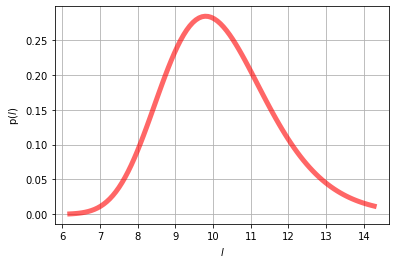

In [6]:
#affichage d'une loi inverse-gamma pour illustrer
from scipy.stats import invgamma
a=50
b=500 #ou 1/0.4 ?
fig, ax = plt.subplots(1, 1)
x = np.linspace(invgamma.ppf(0.0001, a,scale=b),invgamma.ppf(0.99, a,scale=b), 100)
ax.plot(x, invgamma.pdf(x, a,scale=b),'r-', lw=5, alpha=0.6, label='invgamma pdf')
plt.grid()
ax.set_xlabel(r'$l$')
ax.set_ylabel(r'$\mathrm{p}(l)$')
